# Analysis notebook: `SU2020b_CRY_mix2BB_onspill-LH_aw`  

## Define analysis name

In [1]:
ana_label = "SU2020b_CRY_mix2BB_onspill-LH_aw"

## Preamble

In [2]:
import sys
sys.path.append("..")
from preamble import *

## Load data

In [3]:
!ls ../../../output/results/SU2020b_CRY_mix2BB_onspill-LH_aw

analysis.csv	hists.h5     SU2020b_CRY_mix2BB_onspill-LH_aw.log
cut_flow.csv	info.txt     SU2020b_CRY_mix2BB_onspill-LH_aw.yaml
events.parquet	results.pkl


In [4]:
loader = Load(
    in_path = f"../../../output/results/{ana_label}"
)

[Load] ✅ Initialised with out_path=../../../output/results/SU2020b_CRY_mix2BB_onspill-LH_aw


In [5]:
results = loader.load_pkl() 
results_from_persistent = loader.load_all() # Persistent backup 

[Load] ✅ Successfully loaded results from ../../../output/results/SU2020b_CRY_mix2BB_onspill-LH_aw/results.pkl
[Load] ✅ Loaded cut stats from ../../../output/results/SU2020b_CRY_mix2BB_onspill-LH_aw/cut_flow.csv
[Load] ✅ Loaded histograms from ../../../output/results/SU2020b_CRY_mix2BB_onspill-LH_aw/hists.h5
[Load] ✅ Loaded analysis info from ../../../output/results/SU2020b_CRY_mix2BB_onspill-LH_aw/analysis.csv
[Load] ✅ Successfully loaded ak.Array from ../../../output/results/SU2020b_CRY_mix2BB_onspill-LH_aw/events.parquet
[Load] ✅ Loaded info from ../../../output/results/SU2020b_CRY_mix2BB_onspill-LH_aw/info.txt


## Analyse results

### Cut flow

In [6]:
display(results["cut_flow"].round(3))

,Cut,Group,Events Passing,Absolute [%],Relative [%],Description
0,No cuts,NaN,2160537,100.000,100.000,No selection applied
1,has_trk_front,Preselect,2126506,98.425,98.425,Tracks intersect tracker entrance
2,is_reco_electron,Preselect,2054807,95.106,96.628,Electron track fits
3,one_reco_electron,Preselect,1479584,68.482,72.006,One reco electron / event
4,is_downstream,Preselect,825787,38.221,55.812,Downstream tracks (p_z > 0 at tracker entrance)
5,is_truth_electron,Preselect,258271,11.954,31.276,Track parents are electrons (truth PID)
6,good_trkqual,Tracker,182914,8.466,70.823,Track fit quality > 0.2
7,within_t0,Tracker,149420,6.916,81.689,t0 at tracker entrance (640 < t_0 < 1650 ns)
8,within_t0err,Tracker,119883,5.549,80.232,Track fit t0 uncertainty (t0err < 0.9 ns)
9,has_hits,Tracker,118293,5.475,98.674,>20 active tracker hits


### Efficiency & rates

In [7]:
display(results["analysis"].round(3))

,Type,CE-like (wide),No veto (wide),CE-like (ext),No veto (ext),CE-like (sig),No veto (sig)
0,k,9110,6,1260,0,150,0
1,N,41100000000,9110,41100000000,1260,41100000000,150
2,Eff [%],0.000022,99.934138,0.000003,100.0,0.0,100.0
3,Eff Err$-$ [%],-0.0,-0.032911,-0.0,-0.079302,-0.0,-0.662252
4,Eff Err$+$ [%],0.0,0.02195,0.0,0.0,0.0,0.0
5,Rate 1B [$\text{day}^{-1}$],0.256293,0.000169,0.426609,0.0,0.390742,0.0
6,Rate 1B Err$-$ [$\text{day}^{-1}$],-0.00267,-0.000067,-0.011951,0.0,-0.031701,0.0
7,Rate 1B Err$+$ [$\text{day}^{-1}$],0.002698,0.0001,0.012292,0.000386,0.034393,0.002968
8,Rate 2B [$\text{day}^{-1}$],0.195801,0.000129,0.325919,0.0,0.298517,0.0
9,Rate 2B Err$-$ [$\text{day}^{-1}$],-0.00204,-0.000051,-0.009131,0.0,-0.024219,0.0


### Histograms

In [8]:
# Setup draw for this cutset
on_spill = "offspill" not in ana_label
draw = Draw(cutset_name=ana_label.split('_')[0], on_spill=on_spill)
# Define image directory
img_dir = f"../../../output/images/{ana_label}"
os.makedirs(img_dir, exist_ok=True)

[Load] ✅ Initialised with out_path=test_out
[pyprint] ⭐️ Initialised Print with verbose = False and precision = 1
[Plot] ⭐️ Initialised


[Plot] ✅ 	Wrote ../../../output/images/SU2020b_CRY_mix2BB_onspill-LH_aw/h1o_1x3_mom_windows.png


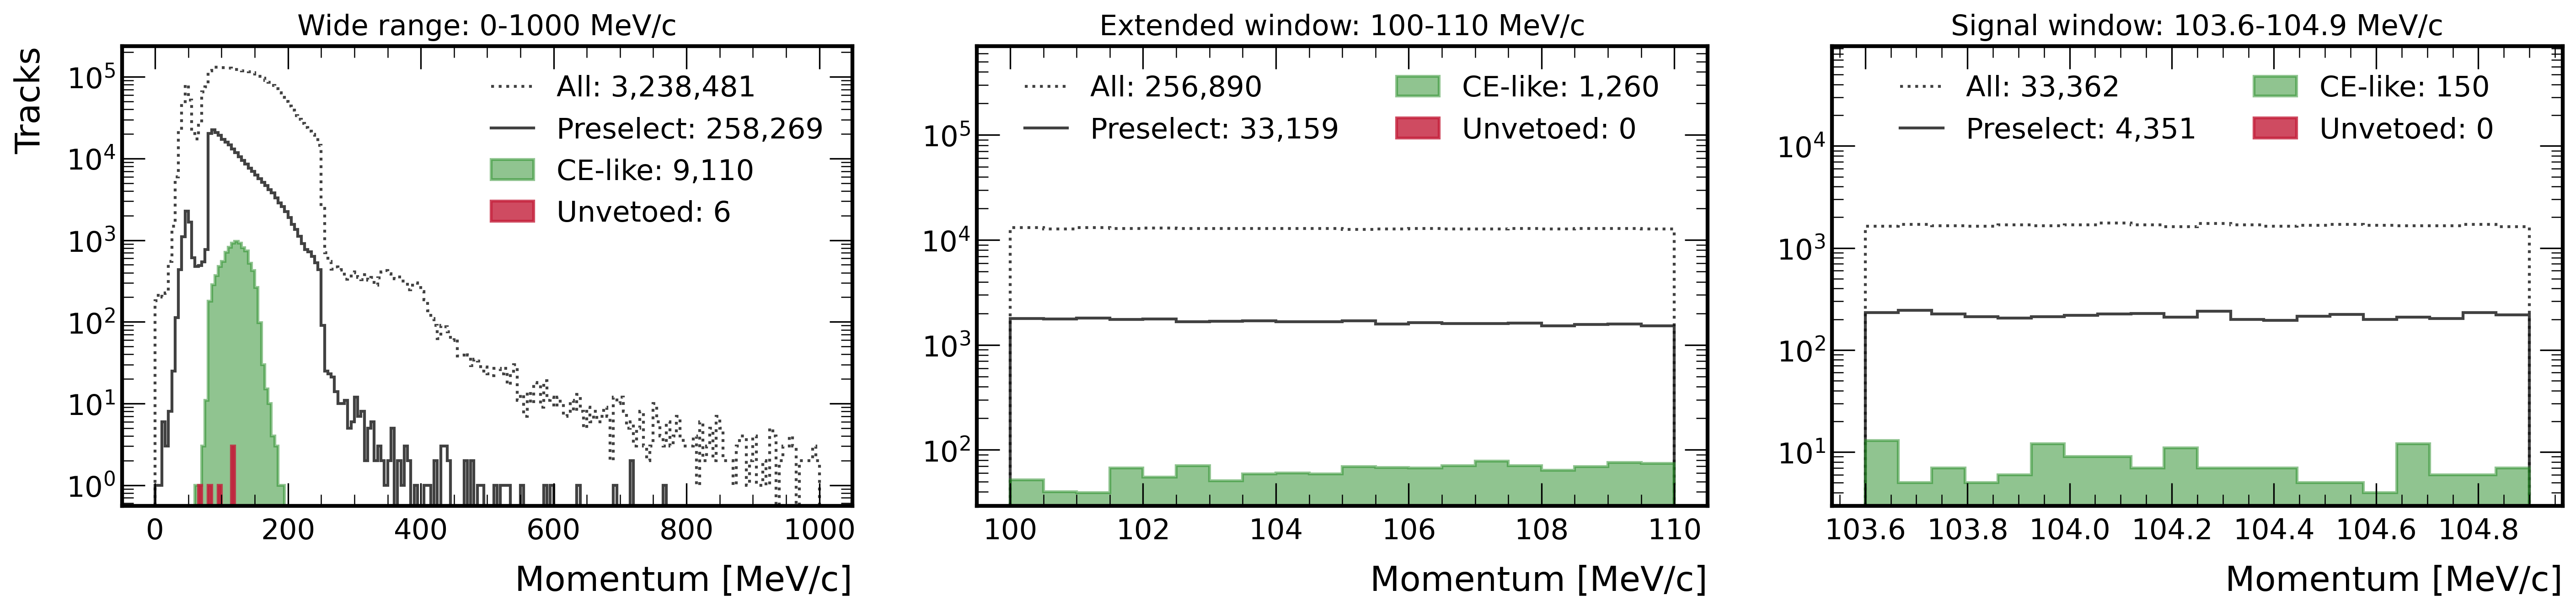

In [9]:
draw.plot_mom_windows(results["hists"], out_path=f"{img_dir}/h1o_1x3_mom_windows.png") 

[Plot] ✅ 	Wrote ../../../output/images/SU2020b_CRY_mix2BB_onspill-LH_aw/h1o_3x3_summary.png


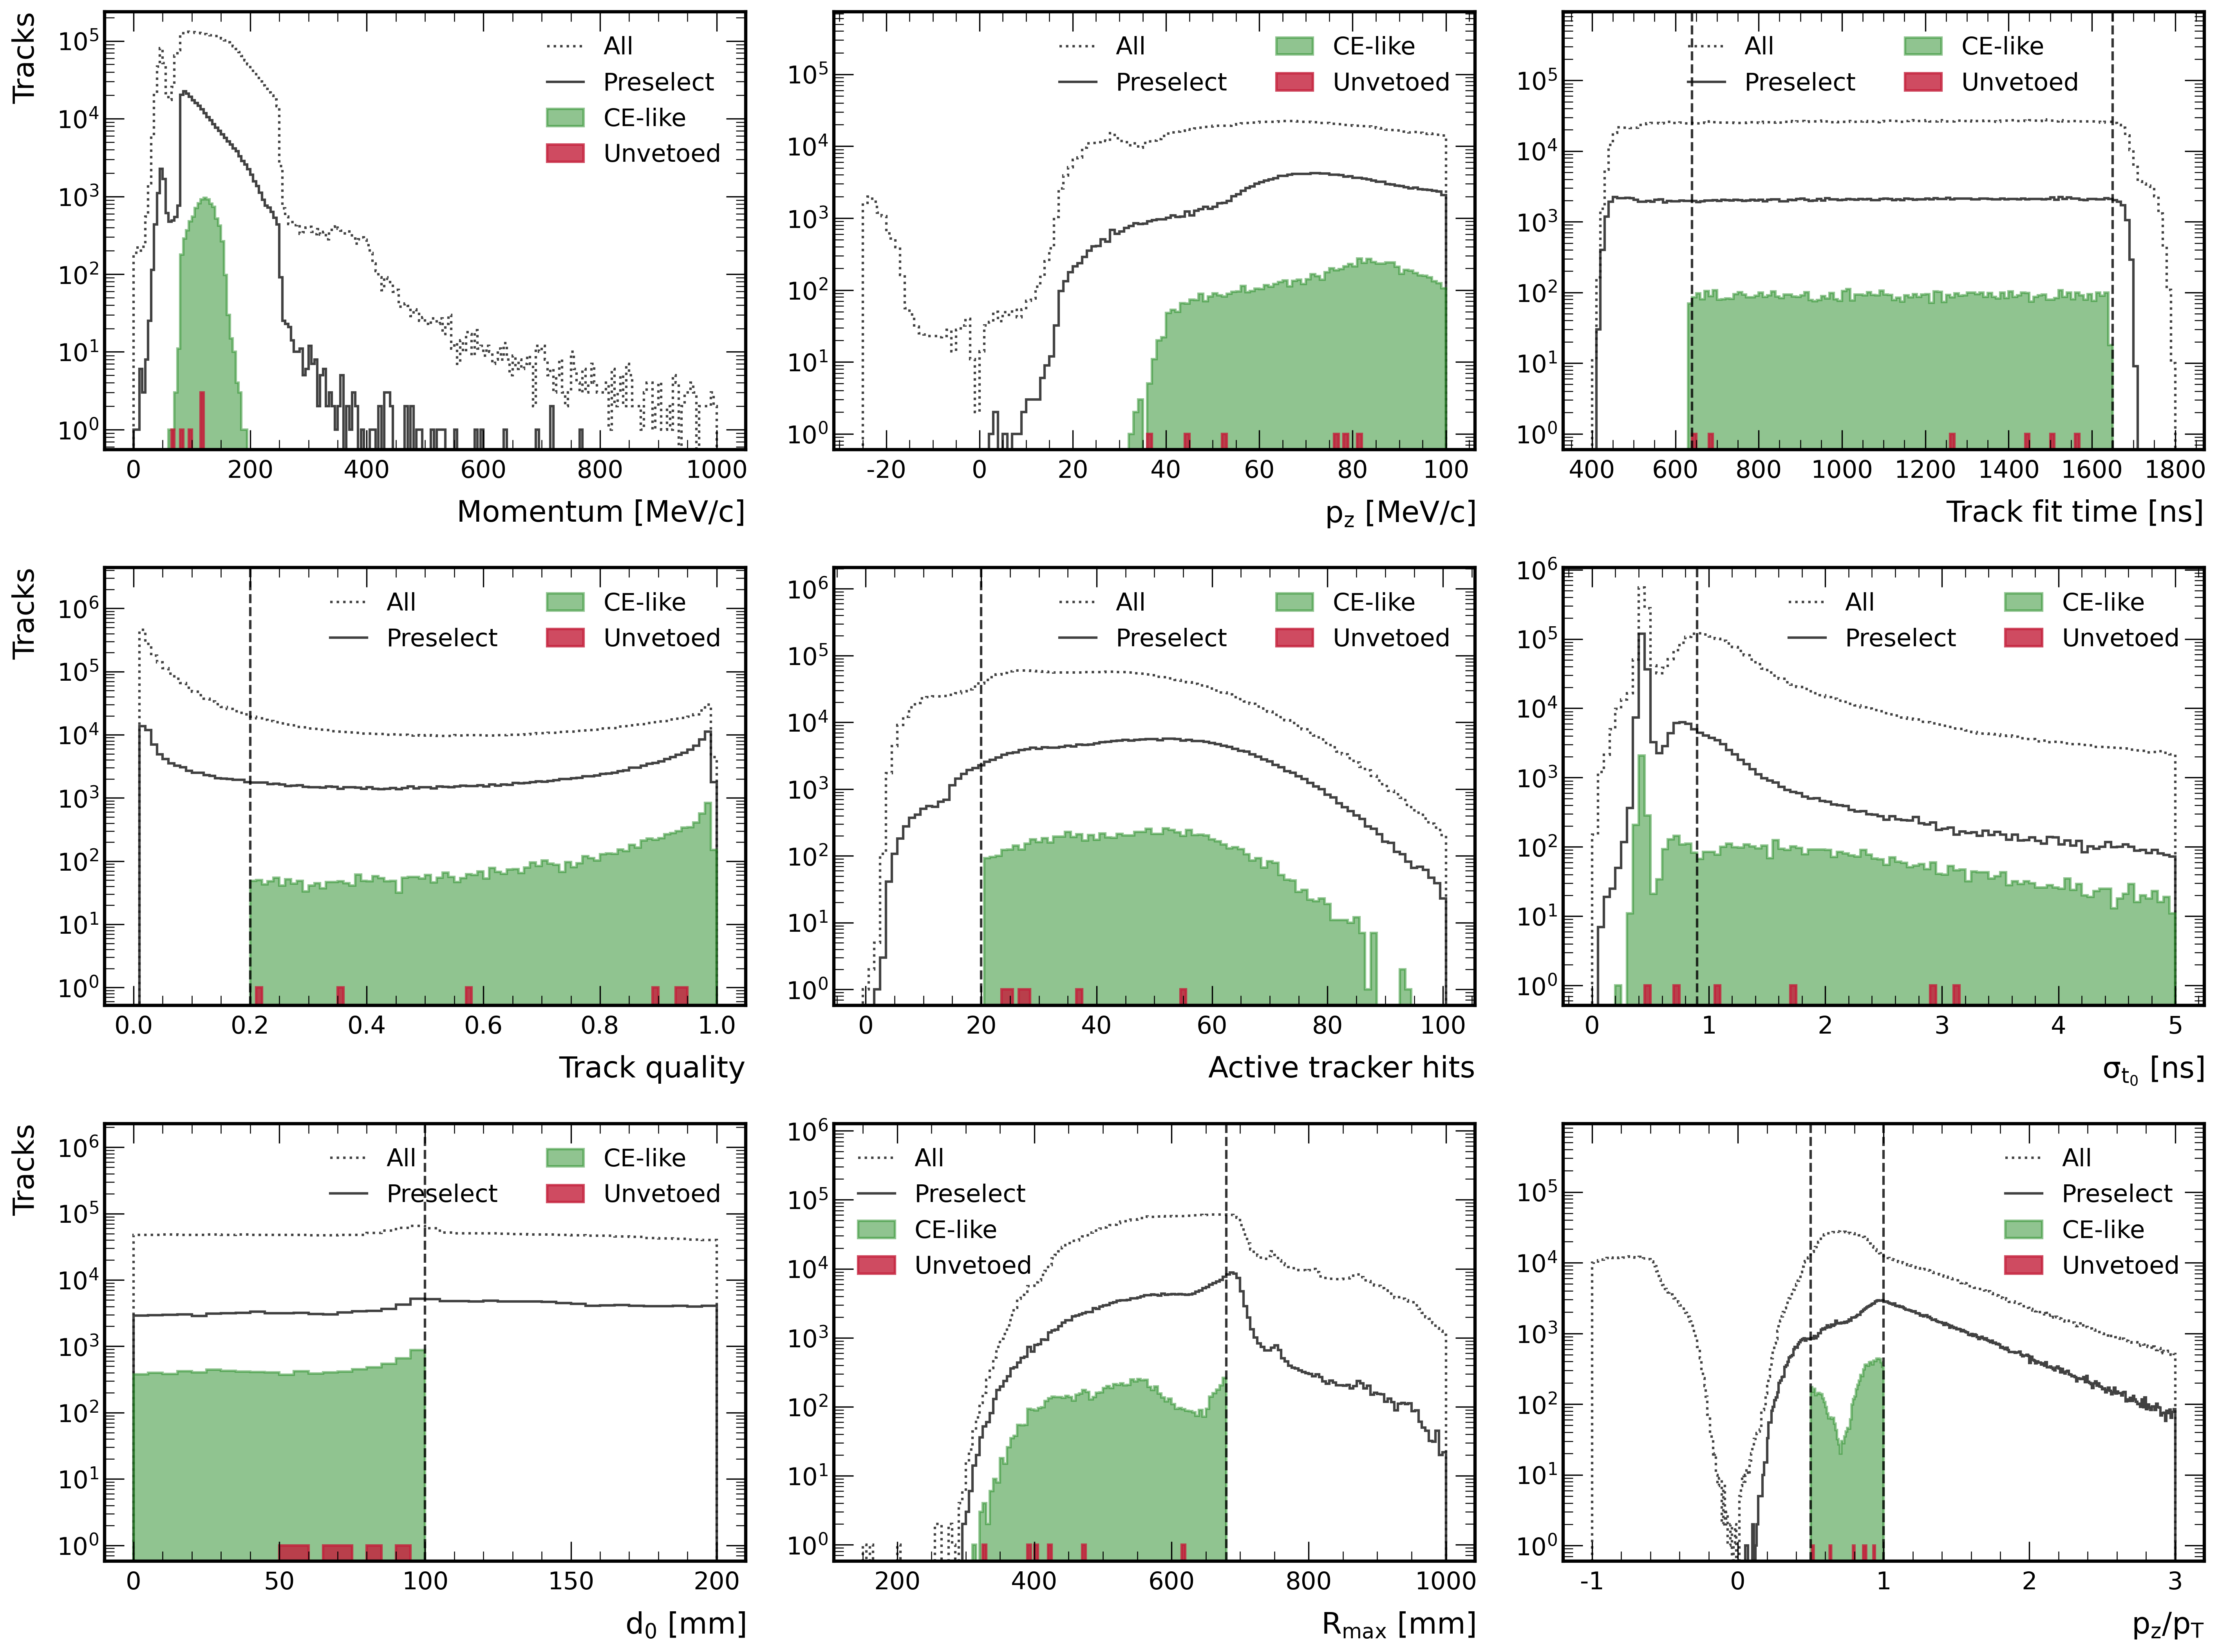

In [10]:
draw.plot_summary(results["hists"], out_path=f"{img_dir}/h1o_3x3_summary.png")

[Plot] ✅ 	Wrote ../../../output/images/SU2020b_CRY_mix2BB_onspill-LH_aw/h1o_2x2_mom_summary.png


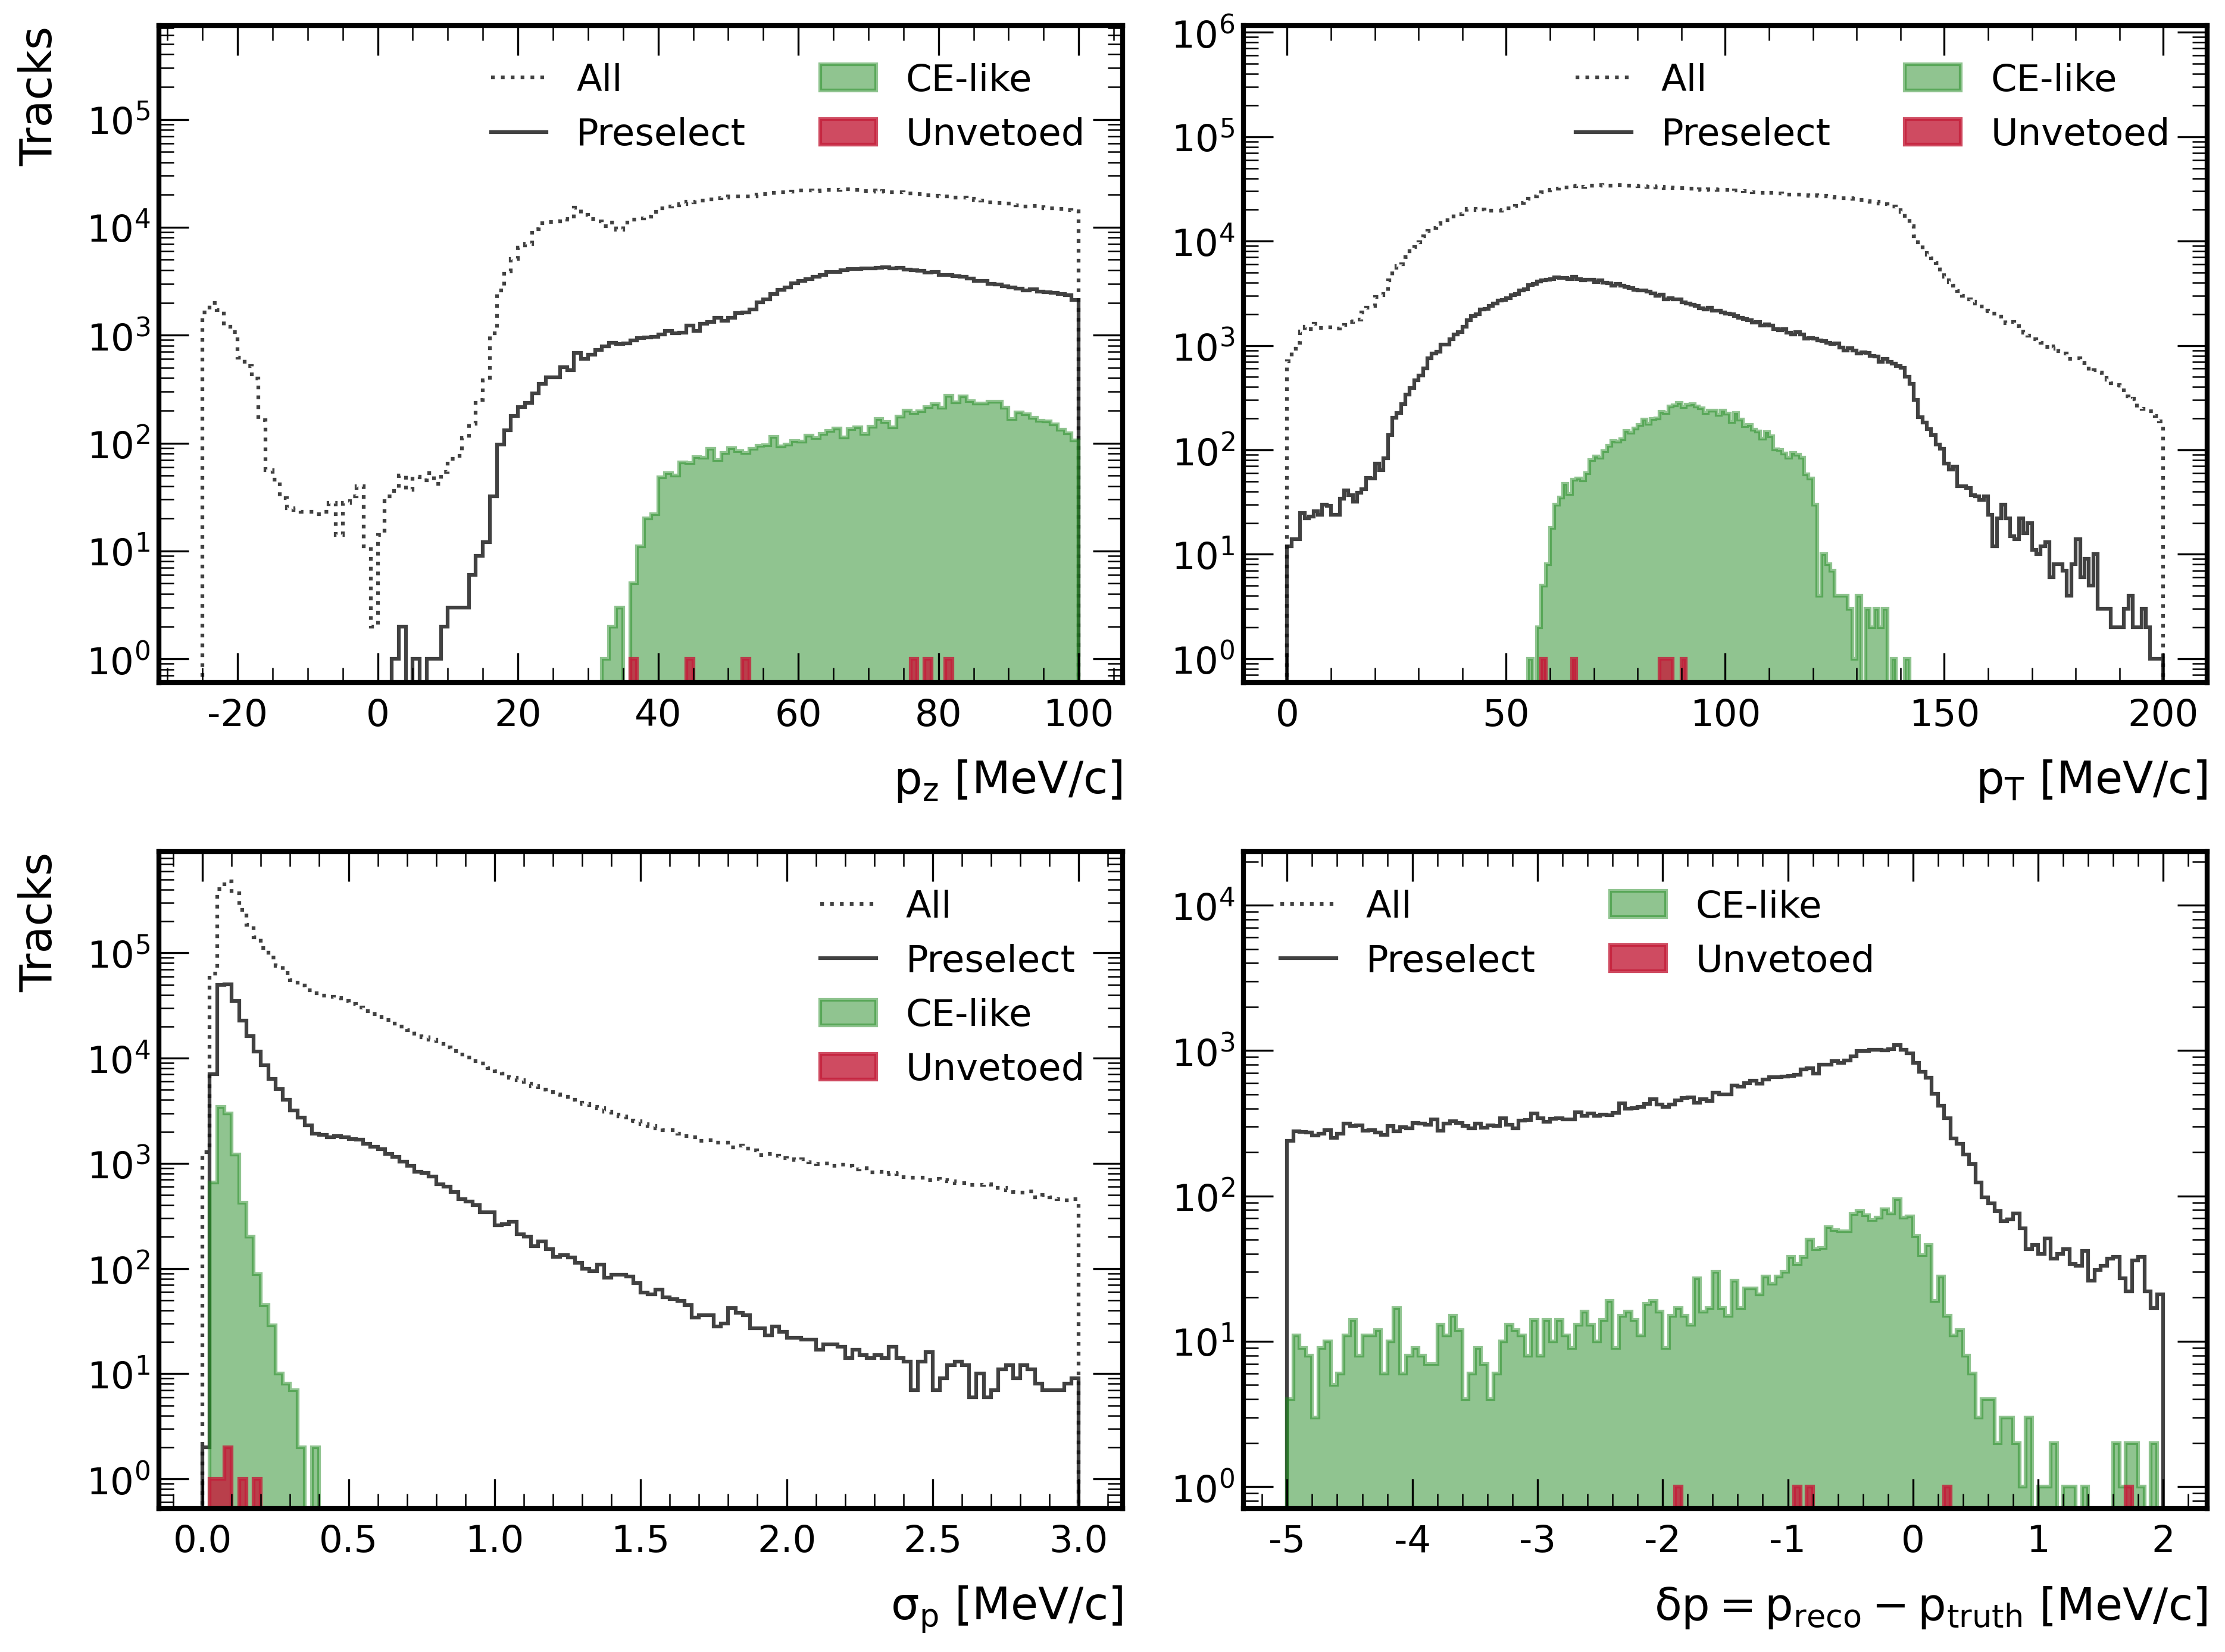

In [11]:
draw.plot_mom_summary(results["hists"], out_path=f"{img_dir}/h1o_2x2_mom_summary.png")

[Plot] ✅ 	Wrote ../../../output/images/SU2020b_CRY_mix2BB_onspill-LH_aw/h1o_crv_z.png


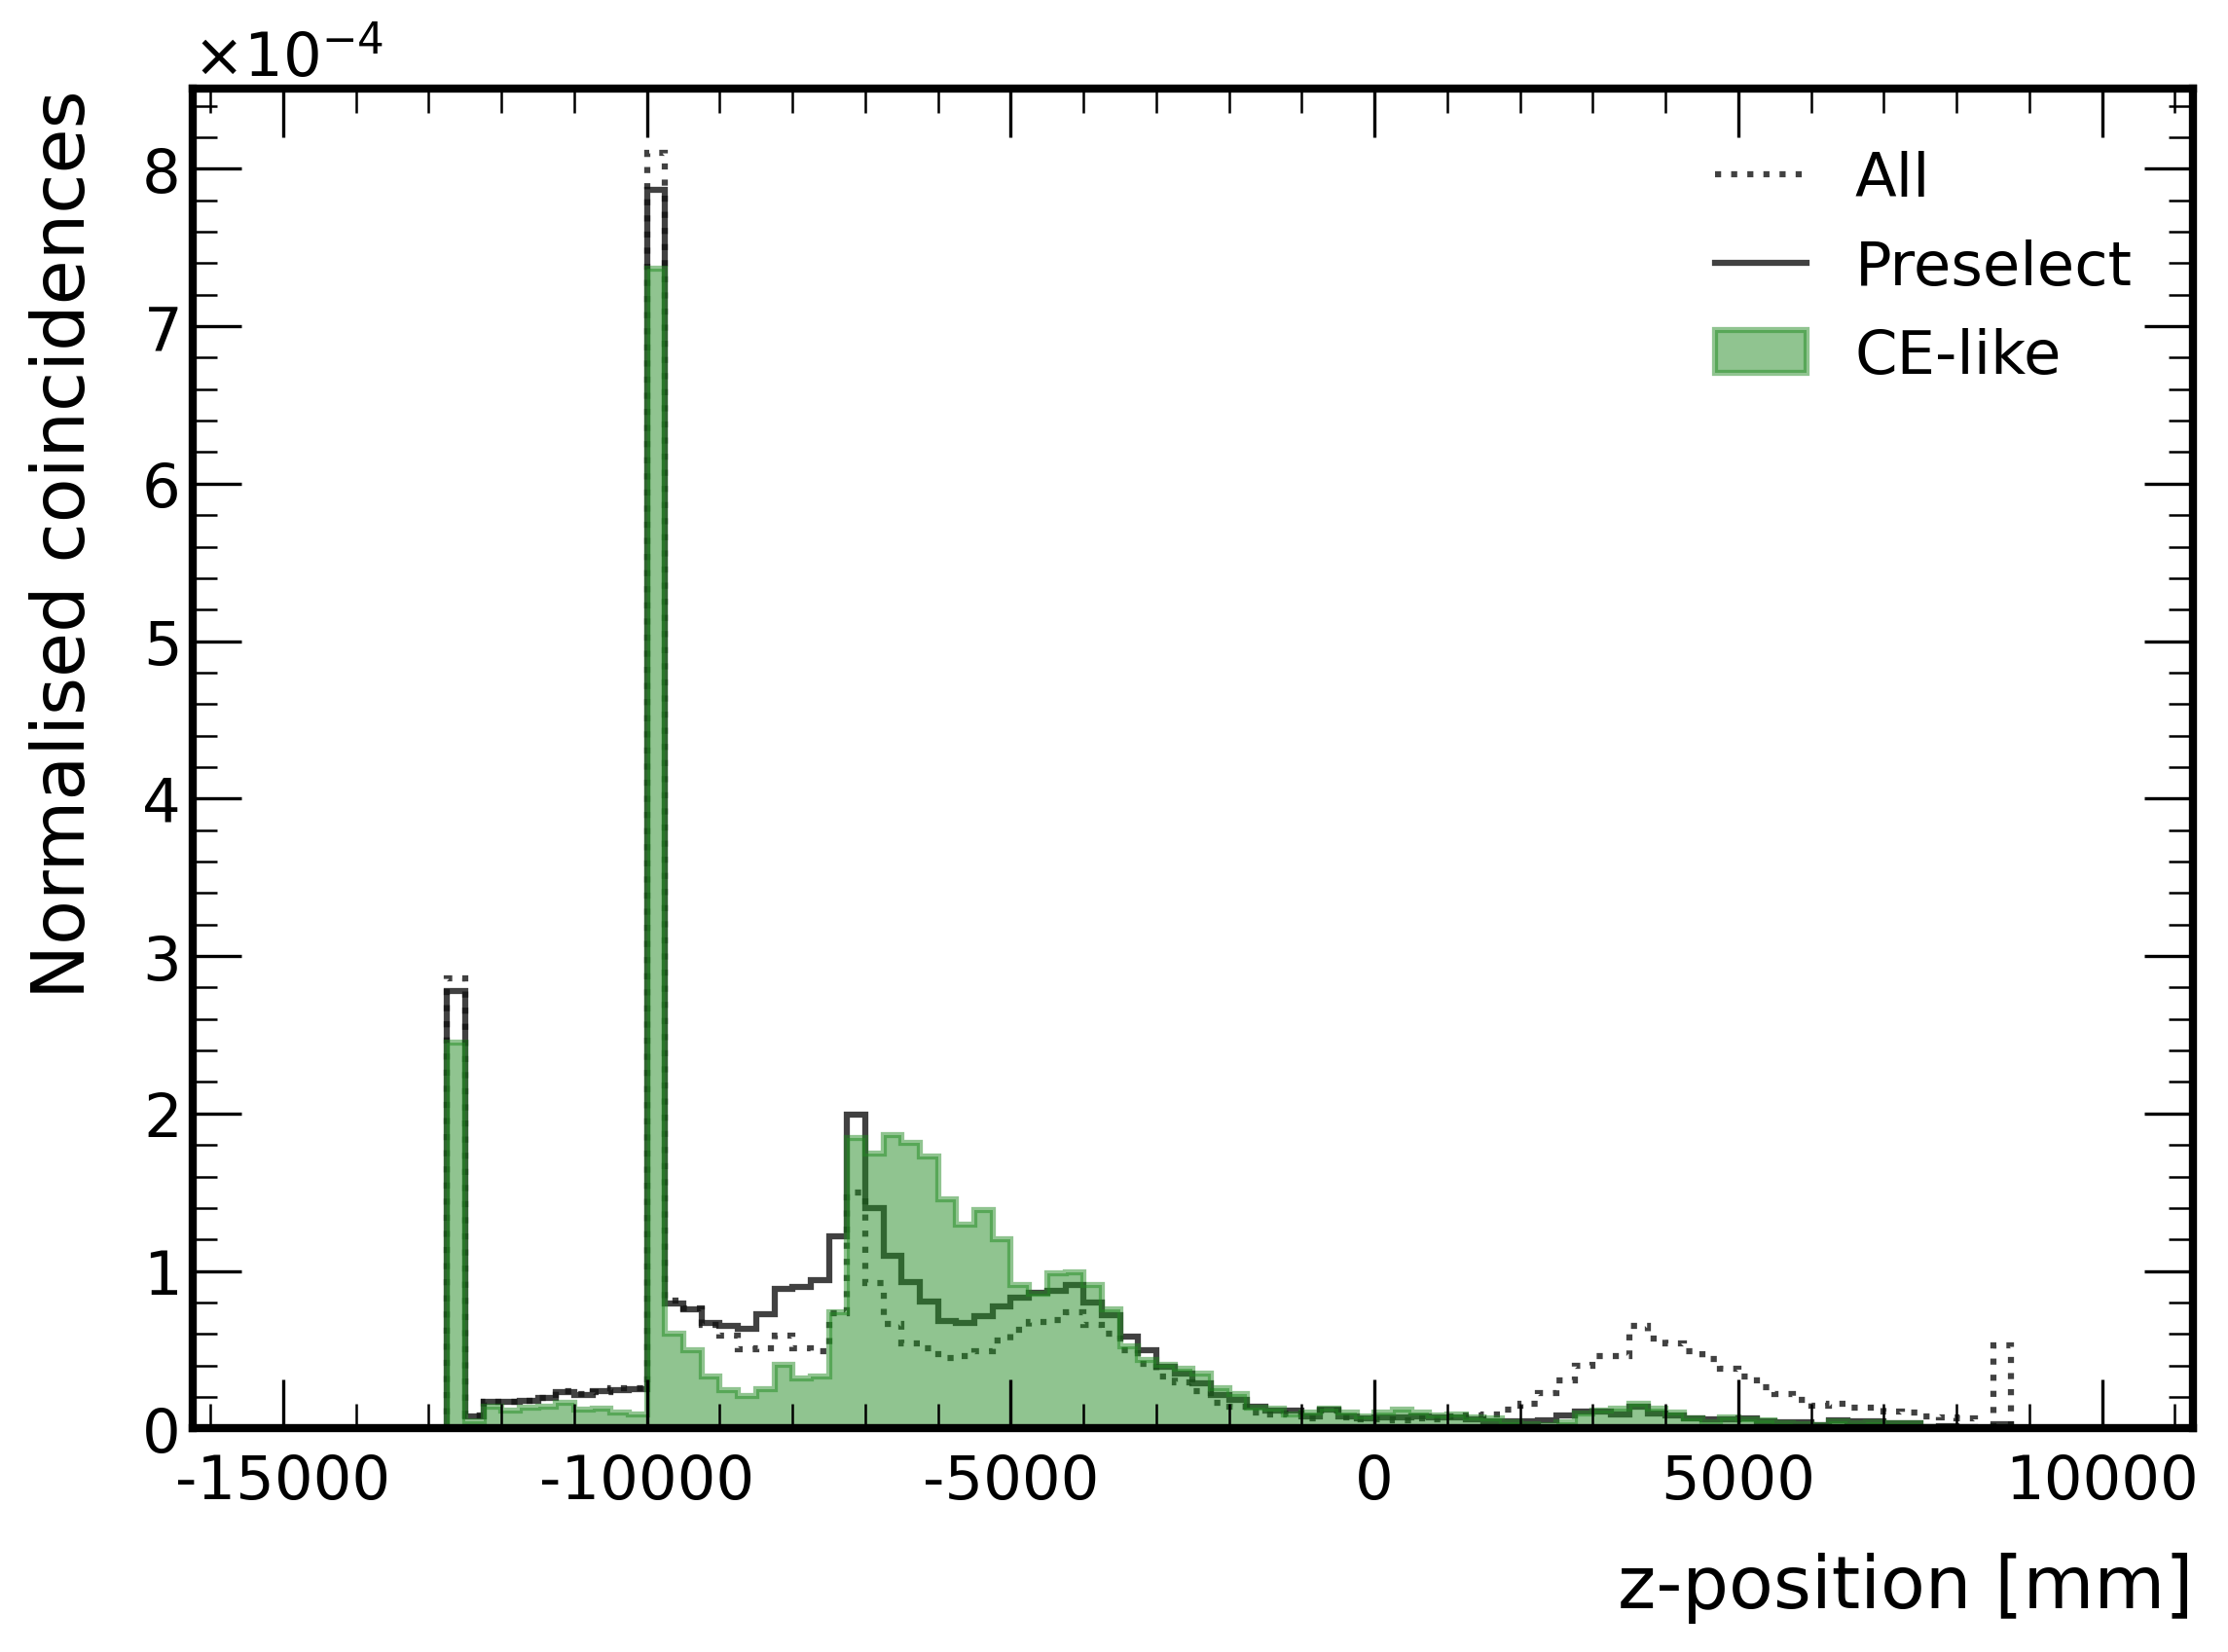

In [12]:
draw.plot_crv_z(results["hists"], out_path=f"{img_dir}/h1o_crv_z.png") 

### Background event info

In [13]:
print(results["event_info"])

  Index:            31
  Subrun:           [4846]
  Event:            [283585]
  File:             nts.mu2e.CosmicCRYSignalAllMix2BBTriggered.MDC2020aw_best_v1_3_v06_05_00.001202_00000075.root
  Track time [ns]:  1446.515747
  Coinc time [ns]:  None
  dt [ns]:          N/A
----------------------------------------
  Index:            66
  Subrun:           [14021]
  Event:            [89446]
  File:             nts.mu2e.CosmicCRYSignalAllMix2BBTriggered.MDC2020aw_best_v1_3_v06_05_00.001202_00001194.root
  Track time [ns]:  1500.584976
  Coinc time [ns]:  874.045227, 1163.859131, 468.694427, 1190.660034, 921.994507, 1671.124023
  dt [ns]:          626.539749
----------------------------------------
  Index:            419
  Subrun:           [37501]
  Event:            [415140]
  File:             nts.mu2e.CosmicCRYSignalAllMix2BBTriggered.MDC2020aw_best_v1_3_v06_05_00.001202_00035306.root
  Track time [ns]:  1562.605279
  Coinc time [ns]:  None
  dt [ns]:          N/A
------------------

In [14]:
if results["events"] is not None:
    from pyutils.pyprint import Print
    printer = Print()
    printer.print_n_events(results["events"], n_events = len(results["events"]))

[pyprint] ⭐️ Initialised Print with verbose = False and precision = 1
[pyprint] ⭐️ Printing 6 event(s)...

-------------------------------------------------------------------------------------
evt.run: 1202
evt.subrun: 4846
evt.event: 283585
crv.crvcoincs.time: []
crv.crvcoincs.nHits: []
crv.crvcoincs.pos.fCoordinates.fZ: []
at_trk_front: [[False, False, False, False, False, ..., False, True, False, False], ...]
has_trk_front: [True, True, True, True]
is_reco_electron: [True, False, False, False]
one_reco_electron: [True, True, True, True]
one_reco_electron_per_event: True
is_downstream: [True, False, True, False]
is_truth_electron: [True, True, True, True]
good_trkqual: [True, True, True, False]
within_t0: [True, True, True, True]
within_t0err: [True, False, False, False]
has_hits: [True, True, True, True]
within_d0: [True, True, True, True]
pitch_angle: [[0.239, 0.549, 0.549, 0.55, 0.551, ..., 0.895, 0.936, 0.963, 0.979], ...]
within_pitch_angle_lo: [True, False, True, False]
within_